In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_dataput_data

In [4]:
mnist = input_data.read_data_sets("/home/nilbson/Downloads/udemy/tensorflow/FULL-TENSORFLOW-NOTES-AND-DATA/03-Convolutional-Neural-Networks",
                                 one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/nilbson/Downloads/udemy/tensorflow/FULL-TENSORFLOW-NOTES-AND-DATA/03-Convolutional-Neural-Networks/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/nilbson/Downloads/udemy/tensorflow/FULL-TENSORFLOW-NOTES-AND-DATA/03-Convolutional-Neural-Networks/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /home/nilbson/Downloads/udemy/tensorflow/FULL-

In [5]:
tf.reset_default_graph()

In [6]:
num_inputs = 784 # 28*28
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = neurons_hid1 # Decoder Begins
num_outputs = num_inputs

learning_rate = 0.01

In [7]:
actf = tf.nn.relu

In [9]:
X = tf.placeholder(tf.float32,shape=[None,num_inputs])

In [10]:
initializer = tf.variance_scaling_initializer()

In [11]:
w1 = tf.Variable(initializer([num_inputs, neurons_hid1]), dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hid1, neurons_hid2]), dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hid2, neurons_hid3]), dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hid3, num_outputs]), dtype=tf.float32)

In [12]:
b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

In [13]:
act_func = tf.nn.relu

In [14]:
hid_layer1 = act_func(tf.matmul(X, w1) + b1)
hid_layer2 = act_func(tf.matmul(hid_layer1, w2) + b2)
hid_layer3 = act_func(tf.matmul(hid_layer2, w3) + b3)
output_layer = tf.matmul(hid_layer3, w4) + b4

In [15]:
loss = tf.reduce_mean(tf.square(output_layer - X))

In [16]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [17]:
train = optimizer.minimize(loss)

In [18]:
init = tf.global_variables_initializer()

In [19]:
saver = tf.train.Saver() 

In [20]:
num_epochs = 5
batch_size = 150

with tf.Session() as sess:
    sess.run(init)
    
    # Epoch == Entire Training Set
    for epoch in range(num_epochs):
        
        num_batches = mnist.train.num_examples // batch_size
        
        # 150 batch size
        for iteration in range(num_batches):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={X: X_batch})
            
        training_loss = loss.eval(feed_dict={X: X_batch})   
        
        print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
     
    saver.save(sess, "./stacked_autoencoder.ckpt") 

Epoch 0 Complete. Training Loss: 0.03177174553275108
Epoch 1 Complete. Training Loss: 0.026966864243149757
Epoch 2 Complete. Training Loss: 0.025230687111616135
Epoch 3 Complete. Training Loss: 0.024458087980747223
Epoch 4 Complete. Training Loss: 0.02225237712264061


In [21]:
#Testing
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess,"./stacked_autoencoder.ckpt")
    
    results = output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./stacked_autoencoder.ckpt


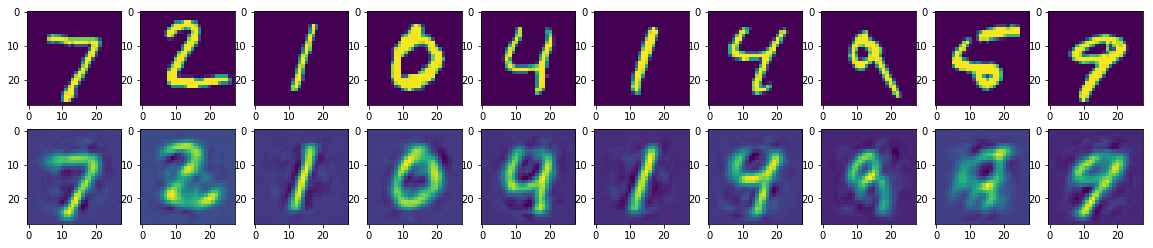

In [22]:
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (28, 28)))